In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import fiona
import numpy as np 
import warnings
import shapely
import rasterio
warnings.filterwarnings("ignore")
def read_gpkg(fnm,layer='perimeter'):
    ''' read gpkg data
    op: 'perimeter', 'fireline', 'newfirepix'
    '''

    gdf = gpd.read_file(fnm,layer=layer)

    return gdf

In [2]:
# Path to your GeoPackage file
gpkg_path = "Largefire/LargeFires_2020.gpkg"

# List all layers in the GeoPackage
layers = fiona.listlayers(gpkg_path)
print("Layers in GeoPackage:", layers)

# Inspect each layer
for layer in layers:
    gdf = gpd.read_file(gpkg_path, layer=layer)
    print(f"Structure of layer '{layer}':")
    print(gdf.dtypes)  # This prints the data types of each column
    print(gdf.head())  # This prints the first few rows for a quick look

Layers in GeoPackage: ['perimeter', 'fireline', 'newfirepix']
Structure of layer 'perimeter':
time             object
clat            float64
clon            float64
ftype             int64
n_pixels          int64
n_newpixels       int64
farea           float64
fperim          float64
flinelen        float64
duration        float64
pixden          float64
meanFRP         float64
year              int64
tst_month         int64
tst_day           int64
tst_ampm         object
ted_year          int64
ted_month         int64
ted_day           int64
ted_ampm         object
fireID            int64
geometry       geometry
dtype: object
                  time       clat        clon  ftype  n_pixels  n_newpixels  \
0  2020-08-01T00:00:00  33.991509 -116.935240      4        53           53   
1  2020-08-01T12:00:00  34.000390 -116.929311      4       103           50   
2  2020-08-02T00:00:00  34.031180 -116.863652      2       468          365   
3  2020-08-02T12:00:00  34.030323 -116.861985   

In [3]:
gdf_lf = read_gpkg(gpkg_path,layer='perimeter')
# gdf_lf_FL = read_gpkg(gpkg_path,layer='fireline')
# gdf_lf_NFP = read_gpkg(gpkg_path,layer='newfirepix')


In [157]:
# Specify the fireID you want to filter by
specific_fireID = 3649
  # Replace with the fireID you are interested in

# Filter rows that match the specific fireID
filtered_gdf = (gdf_lf[gdf_lf['fireID'] == specific_fireID])

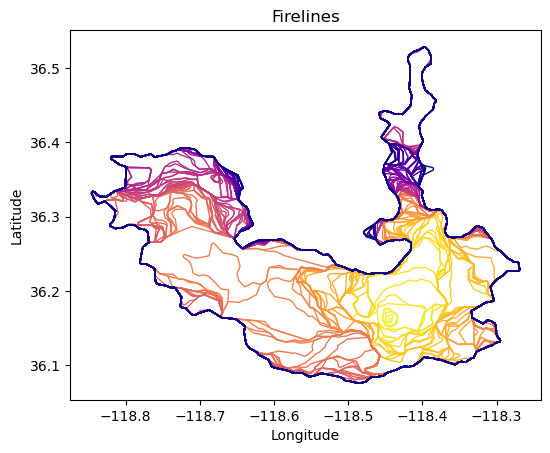

In [158]:
# newfirepix_gdf = gpd.read_file(gpkg_path, layer='newfirepix')

# Create a color map
num_rows = len(filtered_gdf)
colors = plt.cm.plasma(np.linspace(0, 1, num_rows))[::-1]

# Plot each row with a different color
fig, ax = plt.subplots()
for i,(idx, row )in enumerate(filtered_gdf.iterrows()):
    row_gdf = gpd.GeoDataFrame([row], columns=filtered_gdf.columns)
    row_gdf.plot(ax=ax,edgecolor=colors[i],facecolor='none',label=f'Fireline {i+1}')
    

# Setting the title and labels
ax.set_title('Firelines')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [ ]:
minx, miny, maxx, maxy = filtered_gdf.total_bounds

In [155]:
shape = filtered_gdf.iloc[0]
shape = shape['geometry']

In [145]:
minx, miny, maxx, maxy = filtered_gdf.total_bounds
pixel_size = 0.001  # Adjust the pixel size as needed

# Create a mesh grid of points
x_coords = np.arange(minx, maxx, pixel_size)
y_coords = np.arange(miny, maxy, pixel_size)
xx, yy = np.meshgrid(x_coords, y_coords)



points = [shape.contains(shapely.Point(x, y)) for x, y in zip(xx.ravel(), yy.ravel())]
raster = np.array(points)
raster = raster.reshape(xx.shape)



In [156]:
# Print max and min latitude and longitude
print(f"Minimum Longitude: {minx}")
print(f"Maximum Longitude: {maxx}")
print(f"Minimum Latitude: {miny}")
print(f"Maximum Latitude: {maxy}")

Minimum Longitude: -118.45382313895374
Maximum Longitude: -118.43333904020797
Minimum Latitude: 36.15152959572147
Maximum Latitude: 36.17578341150057


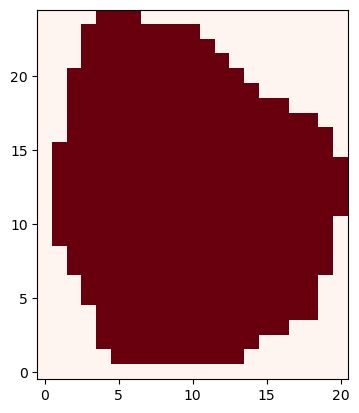

In [153]:
# Plotting
plt.imshow(raster, origin='lower', cmap='Reds')
plt.show()

In [85]:
raster

[903     False
 904     False
 905     False
 906     False
 907     False
         ...  
 1056    False
 1057    False
 1058    False
 1059    False
 1060    False
 Length: 158, dtype: bool,
 903     False
 904     False
 905     False
 906     False
 907     False
         ...  
 1056    False
 1057    False
 1058    False
 1059    False
 1060    False
 Length: 158, dtype: bool,
 903     False
 904     False
 905     False
 906     False
 907     False
         ...  
 1056    False
 1057    False
 1058    False
 1059    False
 1060    False
 Length: 158, dtype: bool,
 903     False
 904     False
 905     False
 906     False
 907     False
         ...  
 1056    False
 1057    False
 1058    False
 1059    False
 1060    False
 Length: 158, dtype: bool,
 903     False
 904     False
 905     False
 906     False
 907     False
         ...  
 1056    False
 1057    False
 1058    False
 1059    False
 1060    False
 Length: 158, dtype: bool,
 903     False
 904     False
 905     F

In [ ]:
from PIL import Image


